In [3]:
import pandas as pd
file_loc = '/daily-website-visitors.csv'
dataset = pd.read_csv(file_loc,
                      index_col = 'Date',
                      thousands=',')
dataset.index = pd.to_datetime(dataset.index)
dataset

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236
...,...,...,...,...,...,...,...
2020-08-15,2163,Saturday,7,2221,1696,1373,323
2020-08-16,2164,Sunday,1,2724,2037,1686,351
2020-08-17,2165,Monday,2,3456,2638,2181,457


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2167 entries, 2014-09-14 to 2020-08-19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   int64 
 4   Unique.Visits      2167 non-null   int64 
 5   First.Time.Visits  2167 non-null   int64 
 6   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 135.4+ KB


In [5]:
dataset.describe()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


#**LET'S make a little visual about the visits.**

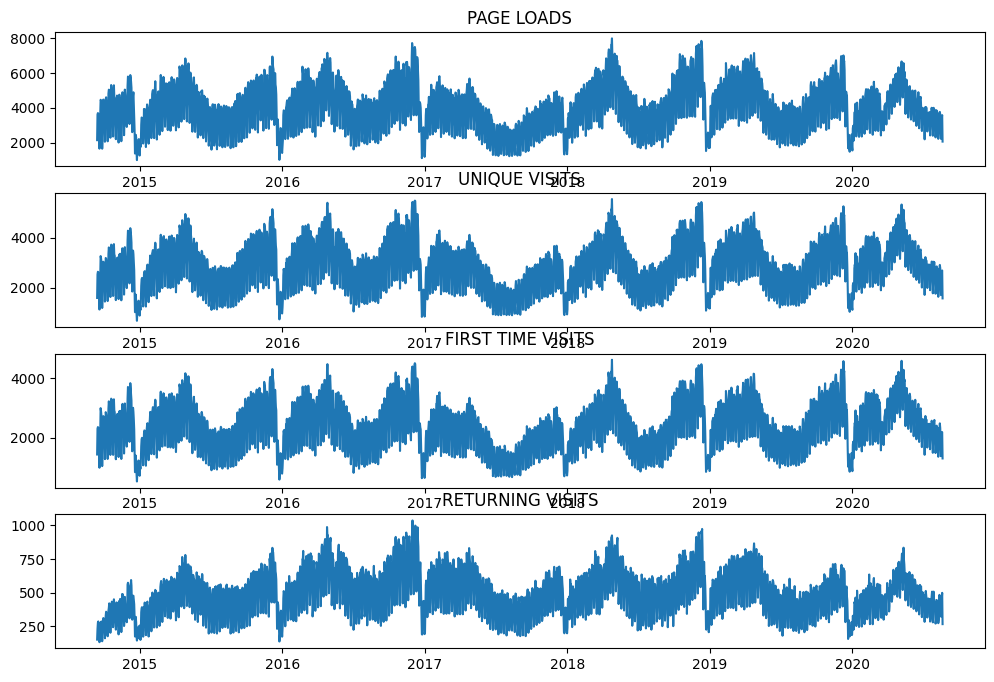

In [13]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(4, figsize=(12, 8))
ax[0].plot(dataset['Page.Loads'])
ax[1].plot(dataset['Unique.Visits'])
ax[2].plot(dataset['First.Time.Visits'])
ax[3].plot(dataset['Returning.Visits'])
ax[0].set_title("PAGE LOADS")
ax[1].set_title("UNIQUE VISITS")
ax[2].set_title("FIRST TIME VISITS")
ax[3].set_title("RETURNING VISITS")

plt.show()

#**LET'S PREPROCESS THE DATA.**#

In [57]:
target_col = dataset['Returning.Visits']
target_col

Date
2014-09-14    152
2014-09-15    231
2014-09-16    278
2014-09-17    287
2014-09-18    236
             ... 
2020-08-15    323
2020-08-16    351
2020-08-17    457
2020-08-18    499
2020-08-19    267
Name: Returning.Visits, Length: 2167, dtype: int64

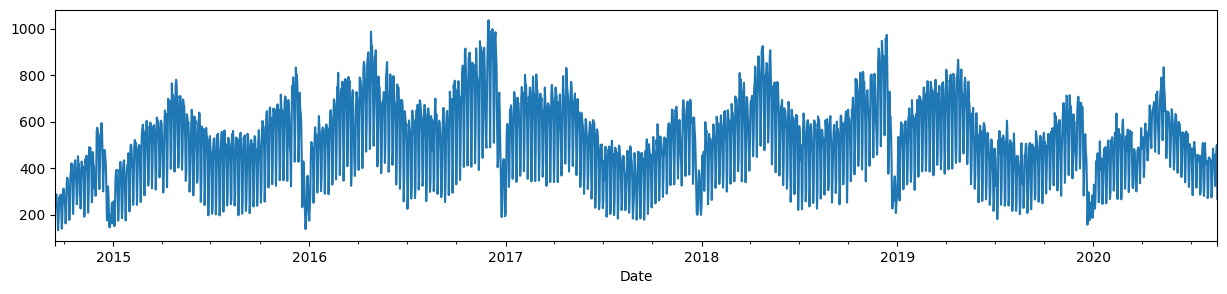

In [23]:
target_col.plot(figsize=(15, 3))
plt.show()

In [26]:
len(target_col)

2167

In [25]:
TEST_DATA_PERCENTAGE = 0.1
boundary_indx = int((1 - TEST_DATA_PERCENTAGE) * len(target_col))

train_data = target_col[:boundary_indx]
test_data = target_col[boundary_indx:]

print(f"Train data:\tReturning Visits [:{boundary_indx}] ({boundary_indx})")
print(f"Test data:\tReturning Visits [{boundary_indx}:] ({len(target_col) - boundary_indx})")
print(f"\nLast target on train data: {train_data[-1]}")


Train data:	Returning Visits [:1950] (1950)
Test data:	Returning Visits [1950:] (217)

Last target on train data: 394


In [33]:
print(f"Train data ending values:{target_col[TEST_DATA_BOUNDARY_INDEX - 10: TEST_DATA_BOUNDARY_INDEX].values}")
print(f"Test datset starting valuesL {target_col[TEST_DATA_BOUNDARY_INDEX: TEST_DATA_BOUNDARY_INDEX + 10].values}")

Train data ending values:[429 423 442 464 372 253 277 515 434 394]
Test datset starting valuesL [441 413 246 314 443 484 473 490 353 249]


#**WINDOW_IZE THE DATASET**

In [58]:
import numpy as np
import pandas as pd

if isinstance(target_col, pd.DataFrame) or isinstance(target_col, pd.Series):
    target_array = target_col.values
else:
    target_array = np.array(target_col)
WINDOW_SIZE = 3
# Now, you can use target_array in your code
train_dataset = timeseries_dataset_from_array(target_array[:-WINDOW_SIZE],
                                              target_array[WINDOW_SIZE:],
                                              sequence_length=WINDOW_SIZE,
                                              end_index=TEST_DATA_BOUNDARY_INDEX - 1)


In [60]:
from keras.utils import timeseries_dataset_from_array
import numpy as np

WINDOW_SIZE = 3

# Ensure target_col is a NumPy array
target_col1 = np.array(target_col)

# Create the train_set
train_set = timeseries_dataset_from_array(
    data=target_col1[:-WINDOW_SIZE],
    targets=target_col1[WINDOW_SIZE:],
    sequence_length=WINDOW_SIZE,
    end_index=TEST_DATA_BOUNDARY_INDEX - WINDOW_SIZE)


In [59]:
target_col[TEST_DATA_BOUNDARY_INDEX-10:TEST_DATA_BOUNDARY_INDEX+10].values, (list(train_dataset)[-1][0][-1].numpy(), list(train_dataset)[-1][1][-1].numpy())

(array([429, 423, 442, 464, 372, 253, 277, 515, 434, 394, 441, 413, 246,
        314, 443, 484, 473, 490, 353, 249]),
 (array([277, 515, 434]), 394))

In [62]:
test_dataset = timeseries_dataset_from_array(target_col[TEST_DATA_BOUNDARY_INDEX - WINDOW_SIZE:],
                                                 target_col[TEST_DATA_BOUNDARY_INDEX:],
                                                 sequence_length=WINDOW_SIZE
                                            )
len(test_dataset), len(list(test_dataset.unbatch()))
(2, 217)

(2, 217)

In [64]:
target_col[TEST_DATA_BOUNDARY_INDEX-10:TEST_DATA_BOUNDARY_INDEX+10].values, list(test_dataset)[0][0][0].numpy(), list(test_dataset)[0][1][0].numpy()

(array([429, 423, 442, 464, 372, 253, 277, 515, 434, 394, 441, 413, 246,
        314, 443, 484, 473, 490, 353, 249]),
 array([515, 434, 394]),
 441)

**first point in test dataset**

In [65]:
list(test_dataset)[0][0][0].numpy(), list(test_dataset)[0][1][0].numpy()

(array([515, 434, 394]), 441)

**last point in test dataset**

In [66]:
list(test_dataset)[-1][0][-1].numpy(), list(test_dataset)[-1][1][-1].numpy()

(array([351, 457, 499]), 267)

**LET'S PLOT THE TRAIN AND  TEST DATA**

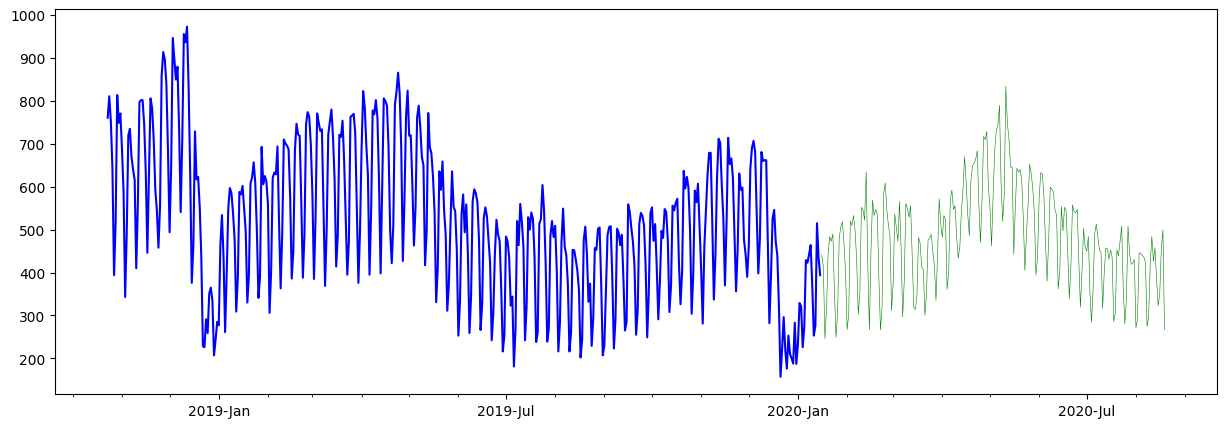

In [68]:
import matplotlib.dates as mdates

def plot_time_series(predictions = None, start_index=1500):
    timesteps = pd.to_datetime(target_col.index)

    fig,ax = plt.subplots(1,figsize=(15,5))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    #plot train data
    plt.plot(timesteps[start_index:TEST_DATA_BOUNDARY_INDEX], target_col[start_index:TEST_DATA_BOUNDARY_INDEX],
            color='blue')
    #plot test dataset
    plt.plot(timesteps[TEST_DATA_BOUNDARY_INDEX:], target_col[TEST_DATA_BOUNDARY_INDEX:],
             color='green', linewidth=0.4)
    if predictions is not None:
        pred_timesteps = timesteps[TEST_DATA_BOUNDARY_INDEX:]
        plt.plot(pred_timesteps, predictions, linewidth=0.4, color='red')
        plt.scatter(pred_timesteps, predictions, s=0.4, color='red')

plot_time_series()

#**BASELINE MODEL**

In [70]:
import tensorflow as tf
from keras.layers import Layer
from keras import Model

class NaiveForecastLayer(Model):
    def __init__(self):
        super().__init__()

    def call(self, inputs):
        result = inputs[:, -1]
        return result[:, tf.newaxis]

In [71]:
baseline_model = NaiveForecastLayer()
baseline_model._name = 'model_0'

baseline_model.compile(metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [72]:
baseline_predictions = baseline_model.predict(test_dataset)

2/2 [==============================] - 0s 20ms/step


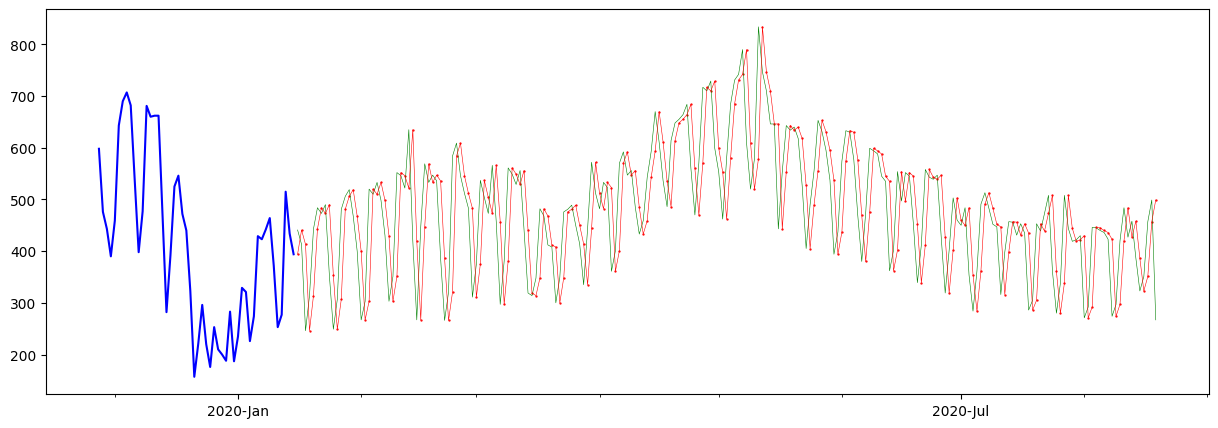

In [75]:
plot_time_series(baseline_predictions.ravel(), start_index=1900)

In [77]:
y_true = target_col[TEST_DATA_BOUNDARY_INDEX : ]

len(y_true), y_true

(217,
 Date
 2020-01-16    441
 2020-01-17    413
 2020-01-18    246
 2020-01-19    314
 2020-01-20    443
              ... 
 2020-08-15    323
 2020-08-16    351
 2020-08-17    457
 2020-08-18    499
 2020-08-19    267
 Name: Returning.Visits, Length: 217, dtype: int64)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def evaluate_predictions(y_true, y_preds):
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_preds)

    return {
        'mae': mae,
        'mse': mse,
        "rmse": rmse,
        "mape": mape
    }

evaluate_predictions(y_true, baseline_predictions)

{'mae': 72.19815668202764,
 'mse': 8508.622119815669,
 'rmse': 92.24219273096054,
 'mape': 0.16713927858326993}

In [80]:
MODEL_METRICS = pd.DataFrame(columns=['mae', 'mse', 'rmse', 'mape'])

def evaluate_model(model):
    predictions = model.predict(test_dataset, verbose=0)
    metrics = evaluate_predictions(y_true, predictions)

    MODEL_METRICS.loc[model.name] = metrics
    plot_time_series(predictions.ravel(), start_index=1900)
    return metrics

{'mae': 72.19815668202764,
 'mse': 8508.622119815669,
 'rmse': 92.24219273096054,
 'mape': 0.16713927858326993}

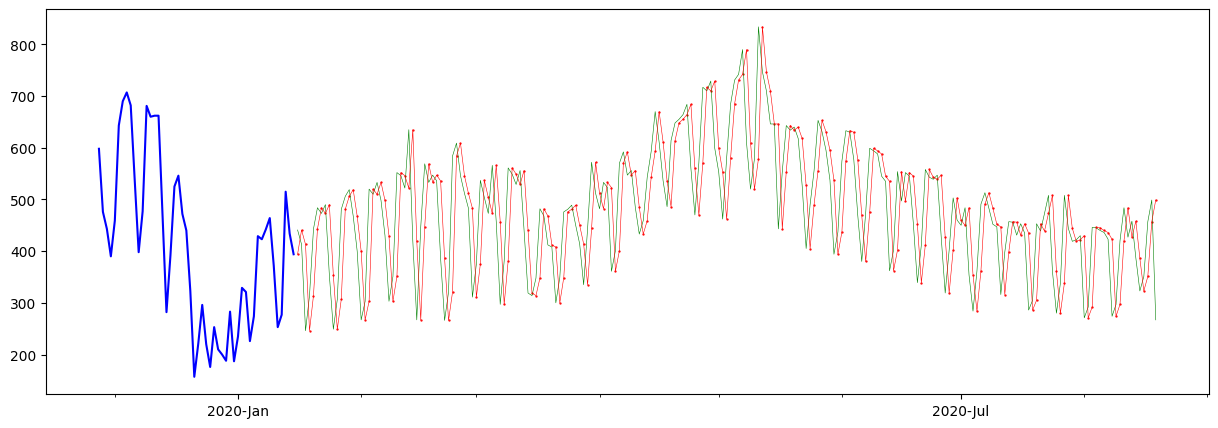

In [81]:
evaluate_model(baseline_model)

In [82]:
MODEL_METRICS

,mae,mse,rmse,mape
model_0,72.198157,8508.62212,92.242193,0.167139


#**Recurrent Network Model**

In [83]:
from keras.layers import GRU, Dense, Input, Lambda
from keras import Sequential

tf.random.set_seed(42)
model_1 = Sequential([
    Input(shape=(WINDOW_SIZE,)),
    Lambda(lambda x: tf.expand_dims(x, axis=1)),
    GRU(128, activation="relu"),
    Dense(1)
], name='model_1')

model_1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam()
)

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 3)              0         
                                                                 
 gru (GRU)                   (None, 128)               51072     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 51201 (200.00 KB)
Trainable params: 51201 (200.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
from keras.callbacks import ModelCheckpoint
import os

def create_checkpoint_callback(model):
    filepath = os.path.join('models', model.name)
    return ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True)

model_1.fit(train_dataset, epochs=5, callbacks=[ create_checkpoint_callback(model_1) ])

Epoch 1/5
16/16 [==============================] - 3s 32ms/step - loss: 478.9003
Epoch 2/5
16/16 [==============================] - 1s 31ms/step - loss: 302.9468
Epoch 3/5
16/16 [==============================] - 0s 28ms/step - loss: 170.8370
Epoch 4/5
16/16 [==============================] - 0s 28ms/step - loss: 133.6493
Epoch 5/5
16/16 [==============================] - 0s 22ms/step - loss: 130.8549


{'mae': 88.47757000198013,
 'mse': 11614.890892560847,
 'rmse': 107.77240320490607,
 'mape': 0.1947460150386166}

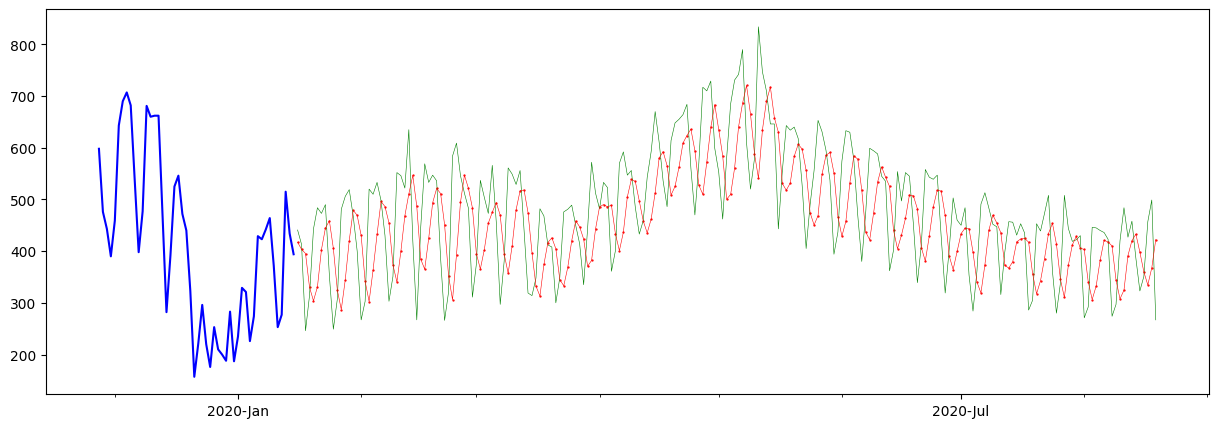

In [85]:
evaluate_model(model_1)

In [86]:
MODEL_METRICS

,mae,mse,rmse,mape
model_0,72.198157,8508.622120,92.242193,0.167139
model_1,88.477570,11614.890893,107.772403,0.194746


In [87]:
unbatched_train_dataset = dataset[:TEST_DATA_BOUNDARY_INDEX + 1].copy()
unbatched_train_dataset

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236
...,...,...,...,...,...,...,...
2020-01-12,1947,Sunday,1,2762,2238,1961,277
2020-01-13,1948,Monday,2,4298,3242,2727,515
2020-01-14,1949,Tuesday,3,3838,2884,2450,434


In [88]:
dataset_by_day = unbatched_train_dataset.groupby(by=['Day'])
dataset_by_day['Returning.Visits'].mean()

Day
Friday       484.697842
Monday       606.512545
Saturday     306.071942
Sunday       390.573477
Thursday     584.627240
Tuesday      617.888889
Wednesday    614.369176
Name: Returning.Visits, dtype: float64

<Axes: xlabel='Day'>

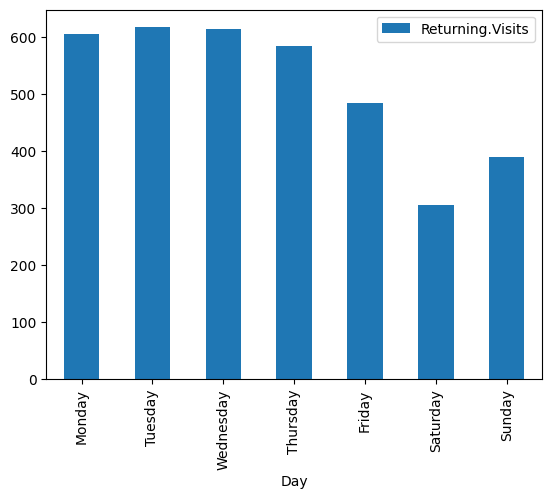

In [89]:
DAYS_OF_WEEK = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pd.DataFrame(dataset_by_day['Returning.Visits'].mean()).loc[DAYS_OF_WEEK].plot(kind='bar')

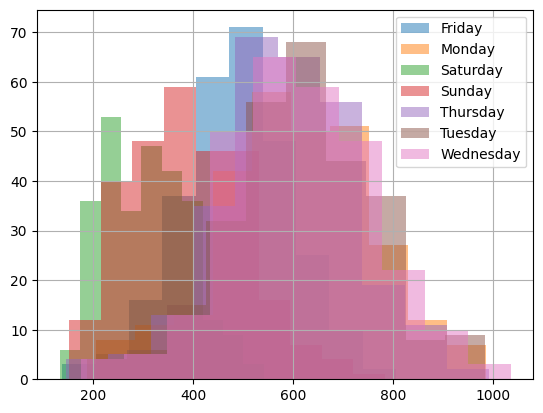

In [90]:
dataset_by_day['Returning.Visits'].hist(legend=True, alpha=0.5)
plt.show()

In [91]:

import calendar

train_dataset_with_months = unbatched_train_dataset.copy()
train_dataset_with_months['Month.Name'] = pd.Series(train_dataset_with_months.index,
                                                    index=train_dataset_with_months.index)\
                                            .apply(lambda x: calendar.month_name[x.month])
train_dataset_with_months

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Month.Name
Date,,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152,September
2014-09-15,2,Monday,2,3621,2528,2297,231,September
2014-09-16,3,Tuesday,3,3698,2630,2352,278,September
2014-09-17,4,Wednesday,4,3667,2614,2327,287,September
2014-09-18,5,Thursday,5,3316,2366,2130,236,September
...,...,...,...,...,...,...,...,...
2020-01-12,1947,Sunday,1,2762,2238,1961,277,January
2020-01-13,1948,Monday,2,4298,3242,2727,515,January
2020-01-14,1949,Tuesday,3,3838,2884,2450,434,January


In [92]:
MONTH_NAMES = list(calendar.month_name)[1:]
dataset_group_by_month = train_dataset_with_months.groupby(by='Month.Name')
dataset_group_by_month['Returning.Visits'].mean().loc[MONTH_NAMES]

Month.Name
January      445.976608
February     549.354610
March        583.470968
April        651.740000
May          601.135484
June         496.180000
July         438.509677
August       437.522581
September    426.173653
October      509.209677
November     569.716667
December     490.274194
Name: Returning.Visits, dtype: float64

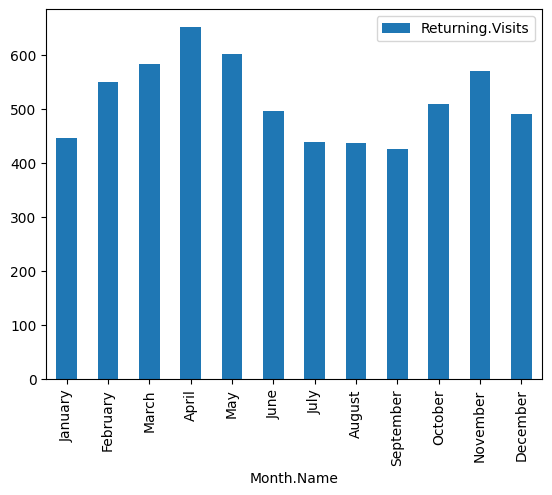

In [93]:
pd.DataFrame(dataset_group_by_month['Returning.Visits'].mean()).loc[MONTH_NAMES].plot(kind='bar')
plt.show()

**Prepare the dataset**

In [94]:
train_dataset_with_months

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Month.Name
Date,,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152,September
2014-09-15,2,Monday,2,3621,2528,2297,231,September
2014-09-16,3,Tuesday,3,3698,2630,2352,278,September
2014-09-17,4,Wednesday,4,3667,2614,2327,287,September
2014-09-18,5,Thursday,5,3316,2366,2130,236,September
...,...,...,...,...,...,...,...,...
2020-01-12,1947,Sunday,1,2762,2238,1961,277,January
2020-01-13,1948,Monday,2,4298,3242,2727,515,January
2020-01-14,1949,Tuesday,3,3838,2884,2450,434,January


In [95]:
dataset2 = train_dataset_with_months.copy()[['Day', 'Month.Name', 'Returning.Visits']]
dataset2

,Day,Month.Name,Returning.Visits
Date,,,
2014-09-14,Sunday,September,152
2014-09-15,Monday,September,231
2014-09-16,Tuesday,September,278
2014-09-17,Wednesday,September,287
2014-09-18,Thursday,September,236
...,...,...,...
2020-01-12,Sunday,January,277
2020-01-13,Monday,January,515
2020-01-14,Tuesday,January,434


In [96]:
def windowize_dataset(dataset):
    for i in range(WINDOW_SIZE):
        dataset[f'Returning.Visits[t-{i+1}]'] = dataset['Returning.Visits'].shift(periods=i+1)
    return dataset

dataset2 = windowize_dataset(dataset2.copy())
dataset2

,Day,Month.Name,Returning.Visits,Returning.Visits[t-1],Returning.Visits[t-2],Returning.Visits[t-3]
Date,,,,,,
2014-09-14,Sunday,September,152,NaN,NaN,NaN
2014-09-15,Monday,September,231,152.0,NaN,NaN
2014-09-16,Tuesday,September,278,231.0,152.0,NaN
2014-09-17,Wednesday,September,287,278.0,231.0,152.0
2014-09-18,Thursday,September,236,287.0,278.0,231.0
...,...,...,...,...,...,...
2020-01-12,Sunday,January,277,253.0,372.0,464.0
2020-01-13,Monday,January,515,277.0,253.0,372.0
2020-01-14,Tuesday,January,434,515.0,277.0,253.0


In [97]:
dataset2 = dataset2.dropna()
dataset2

,Day,Month.Name,Returning.Visits,Returning.Visits[t-1],Returning.Visits[t-2],Returning.Visits[t-3]
Date,,,,,,
2014-09-17,Wednesday,September,287,278.0,231.0,152.0
2014-09-18,Thursday,September,236,287.0,278.0,231.0
2014-09-19,Friday,September,241,236.0,287.0,278.0
2014-09-20,Saturday,September,133,241.0,236.0,287.0
2014-09-21,Sunday,September,175,133.0,241.0,236.0
...,...,...,...,...,...,...
2020-01-12,Sunday,January,277,253.0,372.0,464.0
2020-01-13,Monday,January,515,277.0,253.0,372.0
2020-01-14,Tuesday,January,434,515.0,277.0,253.0


In [98]:
rv_cols = [f"Returning.Visits[t-{i+1}]" for i in range(WINDOW_SIZE)]

dataset2_rv_history_features = dataset2[rv_cols]
dataset2_rv_history_features


,Returning.Visits[t-1],Returning.Visits[t-2],Returning.Visits[t-3]
Date,,,
2014-09-17,278.0,231.0,152.0
2014-09-18,287.0,278.0,231.0
2014-09-19,236.0,287.0,278.0
2014-09-20,241.0,236.0,287.0
2014-09-21,133.0,241.0,236.0
...,...,...,...
2020-01-12,253.0,372.0,464.0
2020-01-13,277.0,253.0,372.0
2020-01-14,515.0,277.0,253.0


In [99]:
dataset2_cat_features =  dataset2[['Day', 'Month.Name']]
dataset2_cat_features

,Day,Month.Name
Date,,
2014-09-17,Wednesday,September
2014-09-18,Thursday,September
2014-09-19,Friday,September
2014-09-20,Saturday,September
2014-09-21,Sunday,September
...,...,...
2020-01-12,Sunday,January
2020-01-13,Monday,January
2020-01-14,Tuesday,January


In [100]:
train_dataset2 = dataset2['Returning.Visits']
train_dataset2

Date
2014-09-17    287
2014-09-18    236
2014-09-19    241
2014-09-20    133
2014-09-21    175
             ... 
2020-01-12    277
2020-01-13    515
2020-01-14    434
2020-01-15    394
2020-01-16    441
Name: Returning.Visits, Length: 1948, dtype: int64

**Building the model**

In [101]:
from keras.layers import Concatenate, Dropout

tf.random.set_seed(42)
def build_model_3():
    seq_input = Input(shape=(WINDOW_SIZE,))
    lambda_layer = Lambda(lambda x: x[:, tf.newaxis])(seq_input)
    rnn_layer = GRU(64, activation='relu')(lambda_layer)

    cat_input = Input(shape=(2,))
    cat_dense_layer = Dense(32, activation='relu')(cat_input)

    concat_layer = Concatenate()([rnn_layer, cat_dense_layer])
    dense_layer1 = Dense(128, activation='relu')(concat_layer)
    dropout_layer = Dropout(0.5)(dense_layer1)
    output_layer = Dense(1, activation='linear')(dropout_layer)

    return Model(inputs=[seq_input, cat_input], outputs=output_layer, name="model_3")

model_3 = build_model_3()
model_3.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam()
)

model_3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 lambda_1 (Lambda)           (None, 1, 3)                 0         ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 gru_1 (GRU)                 (None, 64)                   13248     ['lambda_1[0][0]']            
                                                                                            

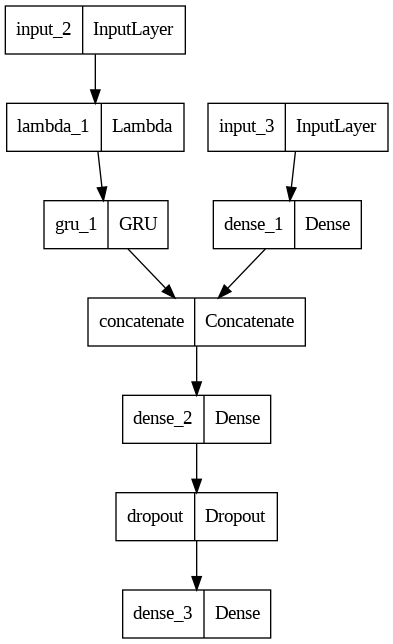

In [102]:
tf.keras.utils.plot_model(model_3)

In [103]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
X_cat_encoder = OrdinalEncoder(categories = [DAYS_OF_WEEK, MONTH_NAMES])
X_cat_encoded = X_cat_encoder.fit_transform(dataset2_cat_features)
X_cat_encoded, X_cat_encoder.categories_

(array([[2., 8.],
        [3., 8.],
        [4., 8.],
        ...,
        [1., 0.],
        [2., 0.],
        [3., 0.]]),
 [array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
         'Sunday'], dtype=object),
  array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December'],
        dtype=object)])

Epoch 1/5
61/61 [==============================] - 4s 3ms/step - loss: 247.8772
Epoch 2/5
61/61 [==============================] - 0s 4ms/step - loss: 95.5574
Epoch 3/5
61/61 [==============================] - 0s 4ms/step - loss: 87.0351
Epoch 4/5
61/61 [==============================] - 0s 4ms/step - loss: 81.4419
Epoch 5/5
61/61 [==============================] - 0s 4ms/step - loss: 78.4773


<Axes: >

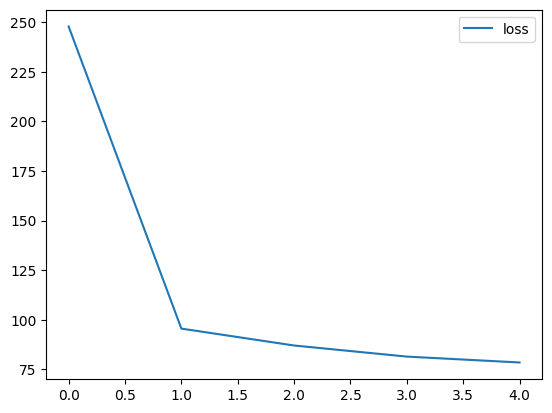

In [104]:
from tensorflow.data import Dataset

model3_history = model_3.fit(x=[dataset2_rv_history_features, X_cat_encoded], y=train_dataset2, epochs=5)
pd.DataFrame(model3_history.history).plot()

In [106]:
test_dataset2 = windowize_dataset(dataset[TEST_DATA_BOUNDARY_INDEX-WINDOW_SIZE:].copy())
test_dataset2['Month.Name'] = pd.Series(test_dataset2.index, index=test_dataset2.index)\
                        .apply(lambda x: calendar.month_name[x.month])
test_dataset2 = test_dataset2.dropna()
test_dataset2

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Returning.Visits[t-1],Returning.Visits[t-2],Returning.Visits[t-3],Month.Name
Date,,,,,,,,,,,
2020-01-16,1951,Thursday,5,3817,2951,2510,441,394.0,434.0,515.0,January
2020-01-17,1952,Friday,6,3175,2419,2006,413,441.0,394.0,434.0,January
2020-01-18,1953,Saturday,7,2336,1927,1681,246,413.0,441.0,394.0,January
2020-01-19,1954,Sunday,1,2597,2031,1717,314,246.0,413.0,441.0,January
2020-01-20,1955,Monday,2,3715,2948,2505,443,314.0,246.0,413.0,January
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2163,Saturday,7,2221,1696,1373,323,386.0,458.0,427.0,August
2020-08-16,2164,Sunday,1,2724,2037,1686,351,323.0,386.0,458.0,August
2020-08-17,2165,Monday,2,3456,2638,2181,457,351.0,323.0,386.0,August


In [107]:
X_test_rv_history_input = test_dataset2[rv_cols]
X_test_rv_history_input

,Returning.Visits[t-1],Returning.Visits[t-2],Returning.Visits[t-3]
Date,,,
2020-01-16,394.0,434.0,515.0
2020-01-17,441.0,394.0,434.0
2020-01-18,413.0,441.0,394.0
2020-01-19,246.0,413.0,441.0
2020-01-20,314.0,246.0,413.0
...,...,...,...
2020-08-15,386.0,458.0,427.0
2020-08-16,323.0,386.0,458.0
2020-08-17,351.0,323.0,386.0


In [108]:
X_test_cat_input = test_dataset2[['Day', 'Month.Name']]
X_test_cat_input = X_cat_encoder.transform(X_test_cat_input)
X_test_cat_input.shape, X_test_cat_input[:5]

((217, 2),
 array([[3., 0.],
        [4., 0.],
        [5., 0.],
        [6., 0.],
        [0., 0.]]))

In [109]:
model_3_preds = model_3.predict([X_test_rv_history_input, X_test_cat_input])
model_3_preds[:15]

7/7 [==============================] - 1s 5ms/step


array([[305.5503 ],
       [449.51257],
       [340.03714],
       [218.20609],
       [506.13654],
       [457.20728],
       [470.06744],
       [389.448  ],
       [438.15656],
       [237.35915],
       [306.98065],
       [457.7482 ],
       [484.1681 ],
       [469.60846],
       [435.30145]], dtype=float32)

In [110]:
y_dataset = test_dataset2['Returning.Visits']

{'mae': 66.37921923096829,
 'mse': 7288.542556140803,
 'rmse': 85.3729615050386,
 'mape': 0.143966483112374}

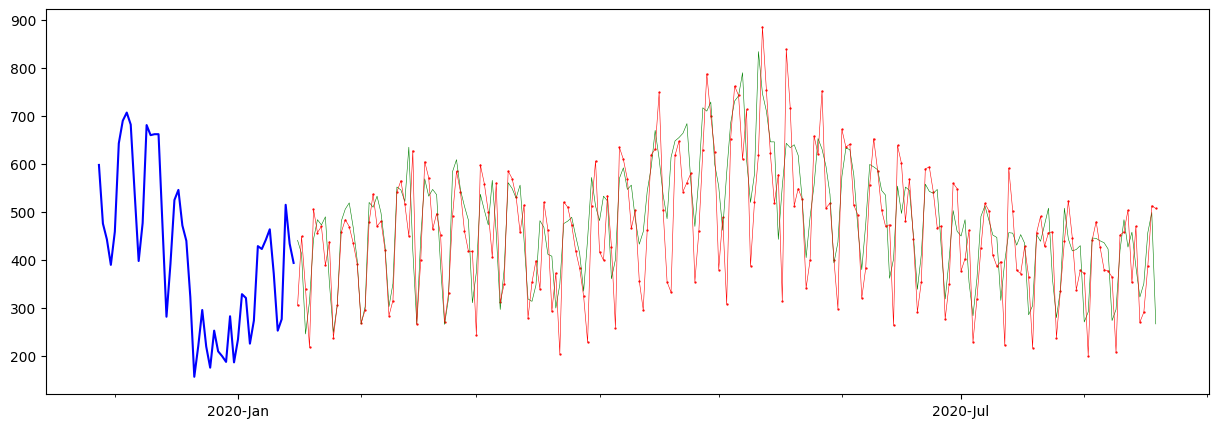

In [111]:
def evaluate_model_predictions(y_true, predictions, model_name):
    metrics = evaluate_predictions(y_true, predictions)

    MODEL_METRICS.loc[model_name] = metrics
    plot_time_series(predictions.ravel(), start_index=1900)
    return metrics

evaluate_model_predictions(y_dataset, model_3_preds, 'model_3 (multi-input)')

In [112]:
MODEL_METRICS

,mae,mse,rmse,mape
model_0,72.198157,8508.622120,92.242193,0.167139
model_1,88.477570,11614.890893,107.772403,0.194746
model_3 (multi-input),66.379219,7288.542556,85.372962,0.143966


**ensemble methods**

In [113]:
def build_model_5(n_models, loss_fns):
    models = []
    for loss_fn in loss_fns:
        print(f"Training {n_models} models for {loss_fn} loss...")
        for i in range(n_models):
            model = Sequential([
                Input(shape=(WINDOW_SIZE,)),
                Lambda(lambda x: tf.expand_dims(x, axis=1)),
                GRU(128, activation='relu'),
                Dense(1, activation='linear')
            ])

            model.compile(loss=loss_fn, optimizer=tf.keras.optimizers.Adam())
            models.append(model)


    return models


model_5 = build_model_5(n_models=5, loss_fns=['mae', 'mse', 'mape'])
model_5

Training 5 models for mae loss...
Training 5 models for mse loss...
Training 5 models for mape loss...


In [114]:
model_5[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1, 3)              0         
                                                                 
 gru_2 (GRU)                 (None, 128)               51072     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 51201 (200.00 KB)
Trainable params: 51201 (200.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
for i, model in enumerate(model_5):
    print(f"Training model {i+1} out of {len(model_5)} models")
    model.fit(train_dataset, epochs=5, verbose=0)

Training model 1 out of 15 models
Training model 2 out of 15 models
Training model 3 out of 15 models
Training model 4 out of 15 models
Training model 5 out of 15 models
Training model 6 out of 15 models
Training model 7 out of 15 models
Training model 8 out of 15 models
Training model 9 out of 15 models
Training model 10 out of 15 models
Training model 11 out of 15 models
Training model 12 out of 15 models
Training model 13 out of 15 models
Training model 14 out of 15 models
Training model 15 out of 15 models


In [116]:
def ensemble_prediction(models):
    predictions = []
    for model in models:
        pred = model.predict(test_dataset, verbose=0)
        predictions.append(pred)

    return np.array(predictions)

model_5_all_preds = ensemble_prediction(model_5)
model_5_all_preds.shape

(15, 217, 1)

In [118]:
model_5_all_preds.shape

(15, 217, 1)

In [119]:
def aggregate_ensemble_predictions(predictions):
    return tf.reduce_mean(predictions, axis=0).numpy()

model_5_preds = aggregate_ensemble_predictions(model_5_all_preds)
model_5_preds.shape

(217, 1)

{'mae': 73.04654872911867,
 'mse': 8556.55393296718,
 'rmse': 92.50164286631443,
 'mape': 0.16257963102721296}

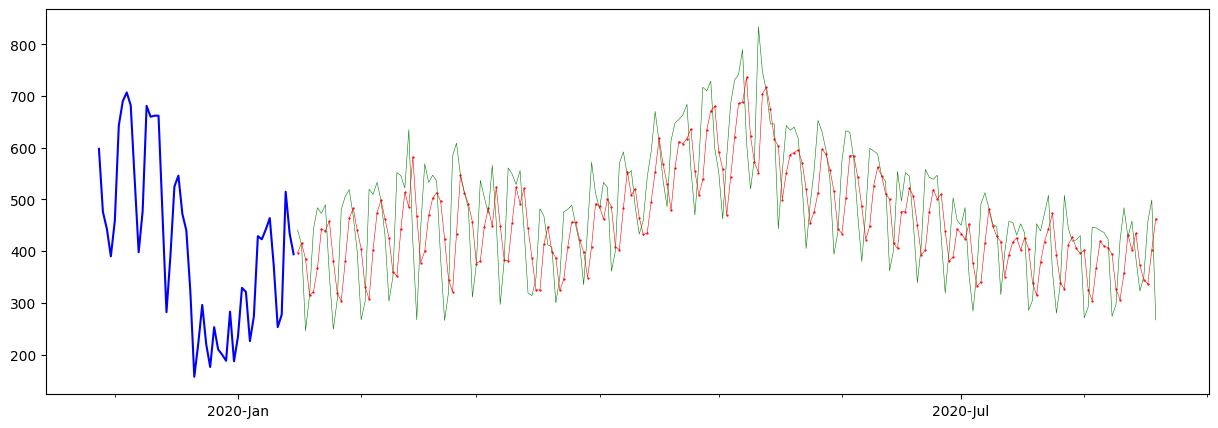

In [120]:
evaluate_model_predictions(y_true, model_5_preds, 'model_5 (ensemble)')

In [121]:
MODEL_METRICS

,mae,mse,rmse,mape
model_0,72.198157,8508.622120,92.242193,0.167139
model_1,88.477570,11614.890893,107.772403,0.194746
model_3 (multi-input),66.379219,7288.542556,85.372962,0.143966
model_5 (ensemble),73.046549,8556.553933,92.501643,0.162580
